In [42]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn import linear_model
#from sklearn import cross_validation
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from random import seed
from random import randrange
from csv import reader
import csv
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [44]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [46]:
import io
df=pd.read_csv(io.BytesIO(uploaded['train (3).csv']))
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [48]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [49]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [51]:
df= df[df['sc_w'] !=0]
df.shape


(1820, 21)

In [52]:
df['battery_power'].value_counts()

1589    6
1872    6
618     6
1512    5
1807    5
       ..
878     1
906     1
1064    1
903     1
858     1
Name: battery_power, Length: 1052, dtype: int64

In [53]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Handle missing values
df.fillna(0, inplace=True)  # Replace missing values with 0 or use more advanced methods

# Convert categorical variables using label encoding
label_encoder = LabelEncoder()
df['clock_speed'] = label_encoder.fit_transform(df['clock_speed'])
df['touch_screen'] = label_encoder.fit_transform(df['touch_screen'])

# Drop original categorical columns
df.drop(['clock_speed', 'touch_screen'], axis=1, inplace=True)

# Display the preprocessed data
print(df.head())

   battery_power  blue  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0            842     0         0   1       0           7    0.6        188   
1           1021     1         1   0       1          53    0.7        136   
2            563     1         1   2       1          41    0.9        145   
3            615     1         0   0       0          10    0.8        131   
4           1821     1         0  13       1          44    0.6        141   

   n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0        2   2         20       756  2549     9     7         19        0   
1        3   6        905      1988  2631    17     3          7        1   
2        5   6       1263      1716  2603    11     2          9        1   
3        6   9       1216      1786  2769    16     8         11        1   
4        2  14       1208      1212  1411     8     2         15        1   

   wifi  price_range  
0     1            1  
1     0            2  

**Data distribution**

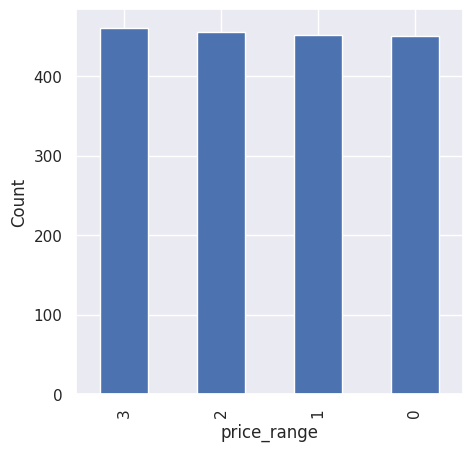

In [55]:
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

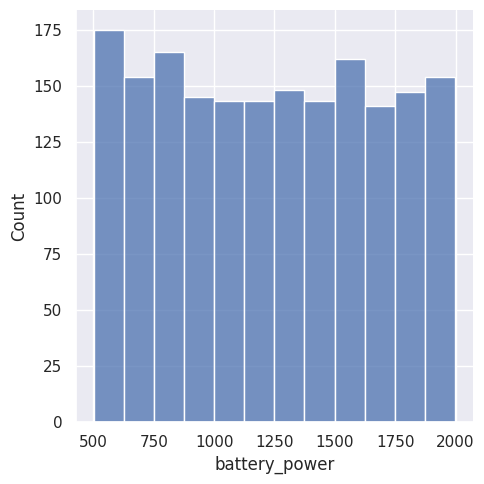

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["battery_power"])
plt.show()

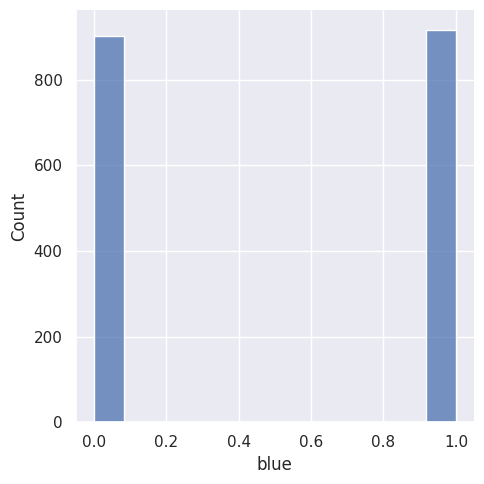

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["blue"])
plt.show()

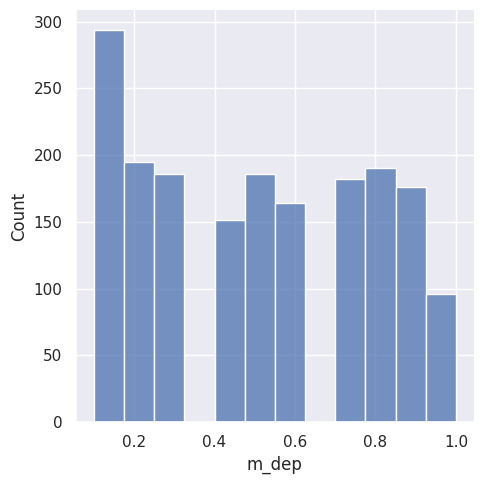

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=df["m_dep"])
plt.show()

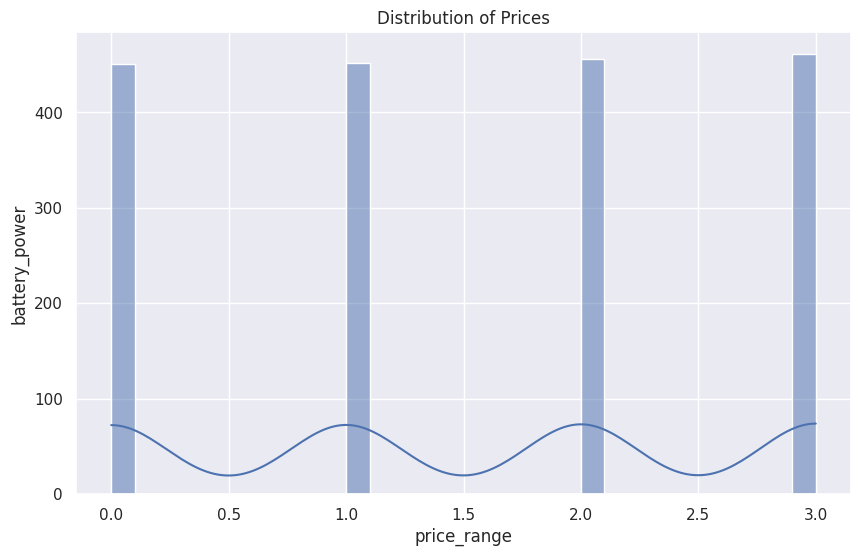

In [56]:
# Visualize distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price_range'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('price_range')
plt.ylabel('battery_power')
plt.show()

In [57]:
df = df.drop(['blue','dual_sim','four_g','three_g','wifi'], axis=1)

In [58]:
df.head()

,battery_power,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [59]:
X=df.drop(['price_range'],axis=1)
y=df['price_range']
X.isna().any()

battery_power    False
fc               False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
dtype: bool

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define features and target
features = ['battery_power','fc',	'int_memory'	,'m_dep',	'mobile_wt',	'n_cores',	'pc',	'px_height',	'px_width'	,'ram'	,'sc_h'	,'sc_w'	,'talk_time'	,'price_range']
target = 'price_range'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=21)

# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()

# Train models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using trained models
linear_predictions = linear_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)

linear_r2 = r2_score(y_test, linear_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print(f"Linear Regression - MSE: {linear_mse}, R-squared: {linear_r2}")
print(f"Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}")


Linear Regression - MSE: 1.9364384697227154e-27, R-squared: 1.0
Random Forest - MSE: 0.0, R-squared: 1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=21)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
   cm=confusion_matrix(y_test, y_pred)
   print(classification_report(y_test, y_pred))
   sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
   plt.xlabel('Predicted Values')
   plt.ylabel('Actual Values')
   plt.title(plt_title)
   plt.show()
   return cm

In [62]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
y_pred_svm=svm_clf.predict(X_test)

SVM Classifier accuracy score: 0.9532967032967034
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       102
           1       0.98      0.93      0.96        92
           2       0.95      0.89      0.92        83
           3       0.92      0.98      0.95        87

    accuracy                           0.95       364
   macro avg       0.95      0.95      0.95       364
weighted avg       0.95      0.95      0.95       364



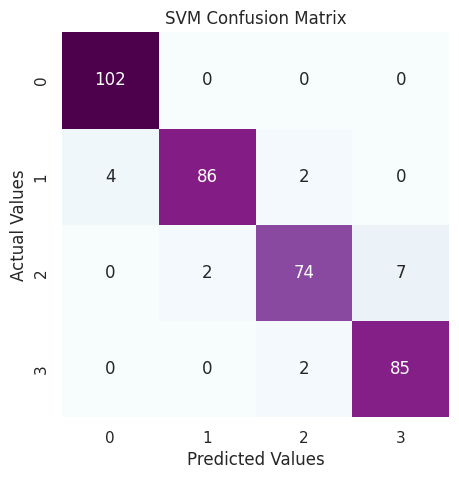

In [63]:
print('SVM Classifier accuracy score:', accuracy_score(y_test, y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')